female confussion matrix:  [[128, 107], [121, 144]] male confussion matrix:  [[144, 121], [107, 128]] female accurary and recall:  (0.5446808510638298, 0.5140562248995983) male accuracy and recall:  (0.5433962264150943, 0.5737051792828686)


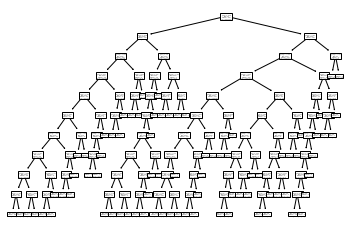

female confussion matrix:  [[197, 175], [52, 76]] male confussion matrix:  [[76, 52], [175, 197]] female accurary and recall:  (0.5295698924731183, 0.7911646586345381) male accuracy and recall:  (0.59375, 0.30278884462151395)
female confussion matrix:  [[192, 161], [57, 90]] male confussion matrix:  [[90, 57], [161, 192]] female accurary and recall:  (0.5439093484419264, 0.7710843373493976) male accuracy and recall:  (0.6122448979591837, 0.35856573705179284)


In [20]:
from description import data_base
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from math import floor
from sklearn import tree
import matplotlib.pyplot as plt


training_rate = 0.9


feature_matrix,class_list = data_base.get_feature_matrix(),data_base.get_class_list()

classifier_methods = [MultinomialNB,lambda:DecisionTreeClassifier(max_depth=10),lambda:RandomForestClassifier(max_depth=10)]

plotting_fs = [lambda clf: None,lambda clf:tree.plot_tree(clf),lambda clf: None]

for classifier_method,plotting_f in zip(classifier_methods,plotting_fs):
    clf = classifier_method()
    training_length = floor(len(feature_matrix) * training_rate)

    clf.fit(feature_matrix[0:training_length],class_list[0:training_length])

    plotting_f(clf)
    plt.show()

    #confussion_matrix_female,confussion_matrix_male = [[0]*2]*2,[[0]*2]*2
    confussion_matrix_female,confussion_matrix_male = [[0,0],[0,0]],[[0,0],[0,0]]
    genre_to_index ={'female':0,'male':1}
    #eliminar = list(zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]))
    #print('eliminar', eliminar)
    def get_accuracy_and_recall(confussion_matrix):
        return confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[0][1]),confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[1][0])
    for predicted_class,real_class in zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]):

        pI,rI = genre_to_index[predicted_class],genre_to_index[real_class]
        confussion_matrix_female[pI][rI]+=1
        confussion_matrix_male[1-pI][1-rI]+=1
   

    female_accuracy_and_recall,male_accuracy_and_recall = get_accuracy_and_recall(confussion_matrix_female),get_accuracy_and_recall(confussion_matrix_male)
    print('female confussion matrix: ',confussion_matrix_female, 'male confussion matrix: ',confussion_matrix_male,'female accurary and recall: ',female_accuracy_and_recall,'male accuracy and recall: ',male_accuracy_and_recall)

#print(normalizedLines)